<a href="https://colab.research.google.com/github/Thiraput01/Dig_img/blob/main/4_Image_Processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Week #4 Frequency Domain

In [1]:
!wget https://drive.google.com/uc?id=1Ku89NM5rj6O3POXLT8vlhh6xDv5AHqXG -O cameraman.tif
!wget https://drive.google.com/uc?id=1J_SEj79YhWVcQrQKVEQkBDHroB-LxZgQ -O moon.png

--2024-09-20 09:48:51--  https://drive.google.com/uc?id=1Ku89NM5rj6O3POXLT8vlhh6xDv5AHqXG
Resolving drive.google.com (drive.google.com)... 74.125.26.138, 74.125.26.102, 74.125.26.100, ...
Connecting to drive.google.com (drive.google.com)|74.125.26.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Ku89NM5rj6O3POXLT8vlhh6xDv5AHqXG [following]
--2024-09-20 09:48:51--  https://drive.usercontent.google.com/download?id=1Ku89NM5rj6O3POXLT8vlhh6xDv5AHqXG
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38783 (38K) [image/png]
Saving to: ‘cameraman.tif’

cameraman.tif       100%[===================>]  37.87K  --.-KB/s    in 0.001s  

2024-09-20 09:48:53 (66.5 MB/s) - ‘cameraman.tif’ sa

## Example #1: Signal combinations

In [2]:
# import here
import numpy as np
from scipy import signal
import scipy as sp
import cv2
import matplotlib.pyplot as plt


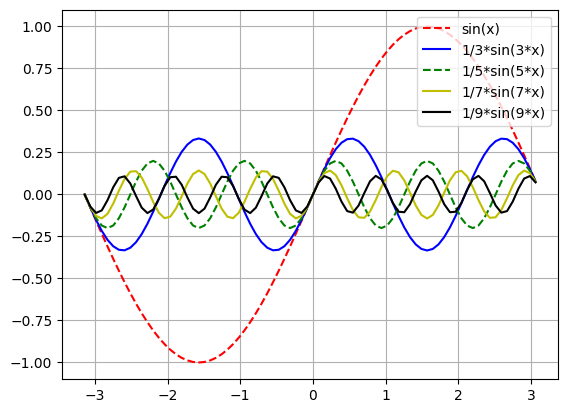

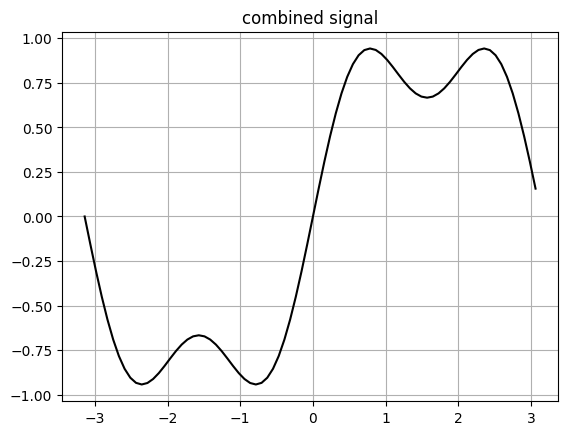

In [3]:
import numpy as np
from matplotlib import pyplot as plt


x = np.arange(-np.pi, np.pi, np.pi/40)
f1 = np.sin(x)
f2 = 1/3*np.sin(3*x)
f3 = 1/5*np.sin(5*x)
f4 = 1/7*np.sin(7*x)
f5 = 1/9*np.sin(9*x)
plt.plot(x, f1, 'r--')
plt.plot(x, f2, 'b')
plt.plot(x, f3, 'g--')
plt.plot(x, f4, 'y')
plt.plot(x, f5, 'black')
plt.legend(('sin(x)', '1/3*sin(3*x)', '1/5*sin(5*x)', '1/7*sin(7*x)', '1/9*sin(9*x)'),
           loc='upper right')

plt.grid(True)
plt.show()



# f6 = f1+f2+f3+f4+f5
f6 = f1 + f2
plt.plot(x, f6, 'black');plt.title("combined signal")
plt.grid(True)
plt.show()




* Conjugate Symmetry

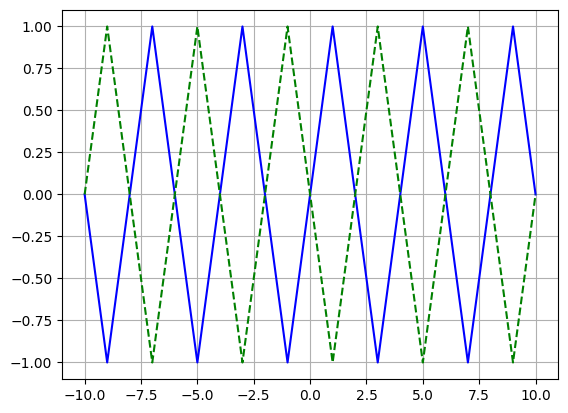

In [4]:
import numpy as np
from matplotlib import pyplot as plt


x = np.arange(-10, 10+1, 1)
f1 = np.sin(2*np.pi*x/4) # v = 1/4
f2 = np.sin(2*np.pi*3*x/4) # v = 3/4
plt.plot(x, f1, 'b')
plt.plot(x, f2, 'g--')

plt.grid(True)
plt.show()

## Example #2 : Fourier Transform
* 2.1 simple image

[[64.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]
[[ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0. 64.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  0.]]


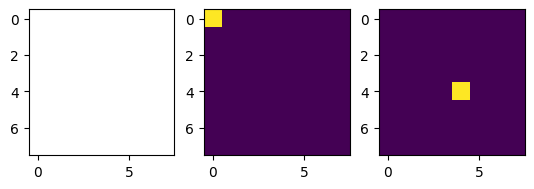

In [8]:
image_simple = np.ones((8,8),dtype=np.uint8)

f = np.fft.fft2(image_simple)
print(abs(f)) # fourier spectrum
fshift = np.fft.fftshift(f)
print(abs(fshift))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(image_simple,cmap = 'gray',vmax = 1, vmin= 0)
ax2.imshow(abs(f))
ax3.imshow(abs(fshift))
plt.show()

* 2.2 simple image #2

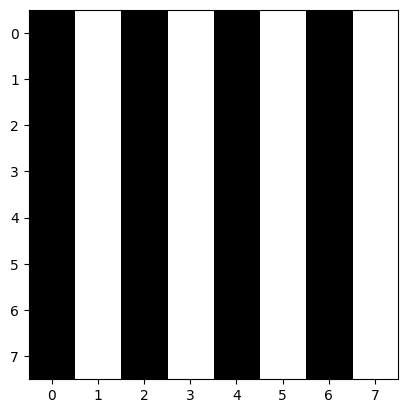

[[6400.    0.    0.    0. 6400.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]]
[[   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [6400.    0.    0.    0. 6400.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]
 [   0.    0.    0.    0.    0.    0.    0.    0.]]


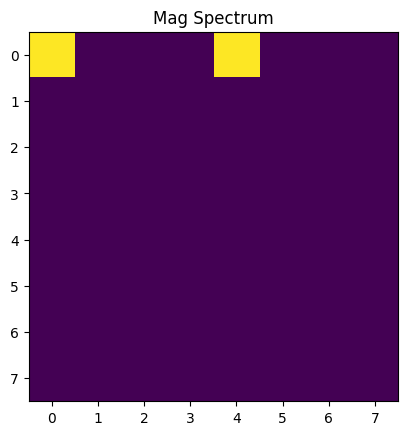

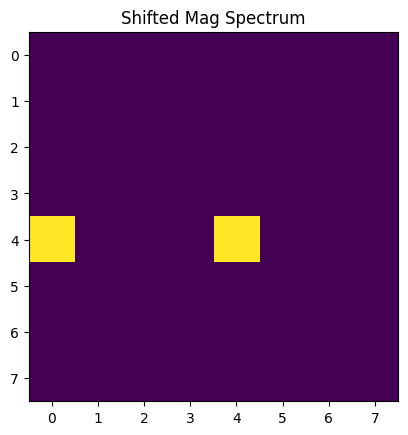

In [9]:
image_simple2 = np.array([(0,200), (0,200)])
image_simple2 = np.tile(image_simple2,(4,4))
plt.imshow(image_simple2,cmap='gray'); plt.show()
f = np.fft.fft2(image_simple2)
print(abs(f))
fshift = np.fft.fftshift(f)
print(abs(fshift))
plt.imshow(abs(f))
plt.title("Mag Spectrum")
plt.show()
plt.imshow(abs(fshift))
plt.title("Shifted Mag Spectrum")
plt.show()

* 2.3 simple image #3

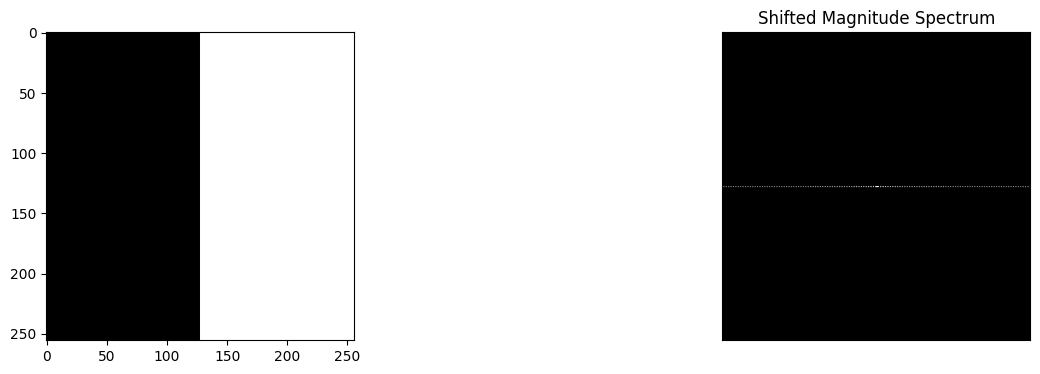

In [10]:
a = np.zeros((256,128),dtype=np.uint8)
b = np.ones((256,128),dtype=np.uint8)
image_simple = np.concatenate((a,b), axis = 1)
f = np.fft.fft2(image_simple)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift)) # fourier spectrum

fig = plt.figure(figsize=(16,4))
plt.subplot(121),plt.imshow(image_simple.astype(np.uint8), cmap = 'gray')
# plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum.astype(np.uint8), cmap = 'gray')
plt.title('Shifted Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


* 2.4 simple image #4

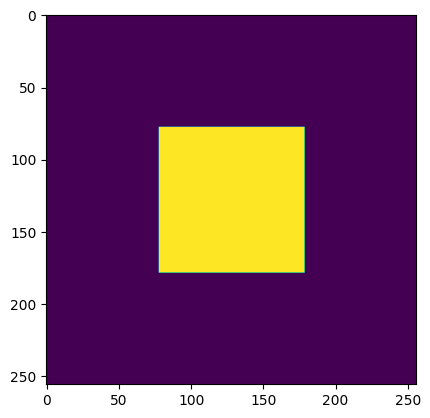

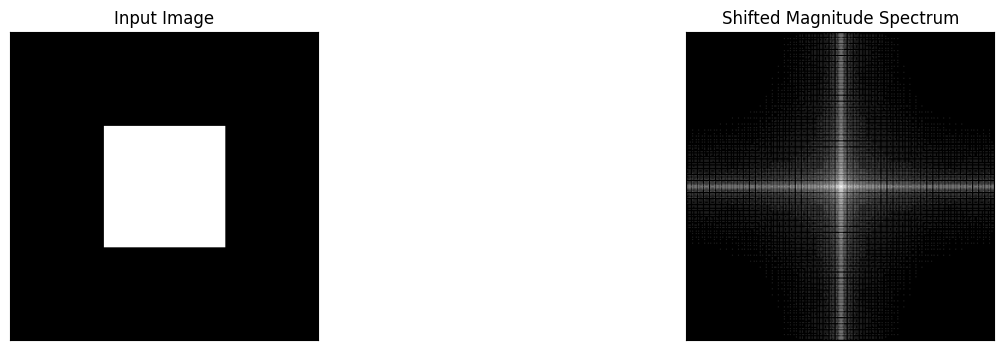

In [11]:
image_simple2 = np.zeros((256,256),dtype=np.uint8)
image_simple2[78:179,78:179] = 1

plt.imshow(image_simple2)
plt.show()



f = np.fft.fft2(image_simple2)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+abs(fshift)) # fourier spectrum

fig = plt.figure(figsize=(16,4))
plt.subplot(121),plt.imshow(image_simple2.astype(np.uint8), cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum.astype(np.uint8), cmap = 'gray')
plt.title('Shifted Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

## Example #3 Convolution
* Convolve2d - https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.convolve2d.html
* filter2d - https://docs.opencv.org/4.x/d4/d86/group__imgproc__filter.html#ga27c049795ce870216ddfb366086b5a04

In [12]:
# Conv2d vs. Filter2D

import numpy as np
from scipy import signal
import scipy as sp
import cv2

# convolution
input = np.array([[0,0,0,0,0],
                  [0,0,0,0,0],
                  [0,0,1,0,0],
                  [0,0,0,0,0],
                  [0,0,0,0,0]],dtype=np.uint8)
kernel = np.array([[1,0,0],
                   [0,2,0],
                   [0,0,3]],dtype=np.uint8)
output = signal.convolve2d(input,kernel,'same') # convolution
print(output)

dst_im = cv2.filter2D(input,-1,kernel,borderType=cv2.BORDER_ISOLATED) # spatial filtering
print(dst_im)

[[0 0 0 0 0]
 [0 1 0 0 0]
 [0 0 2 0 0]
 [0 0 0 3 0]
 [0 0 0 0 0]]
[[0 0 0 0 0]
 [0 3 0 0 0]
 [0 0 2 0 0]
 [0 0 0 1 0]
 [0 0 0 0 0]]


## Exercise #1 : another simple image
* meshgrid() is very useful to evaluate functions on a grid.

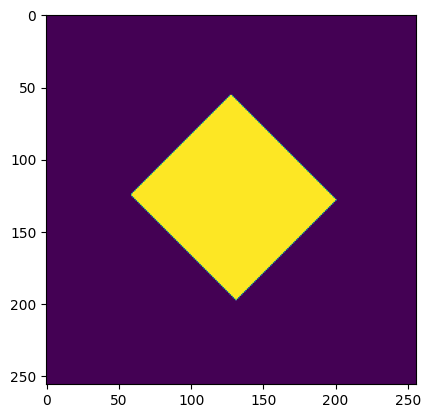

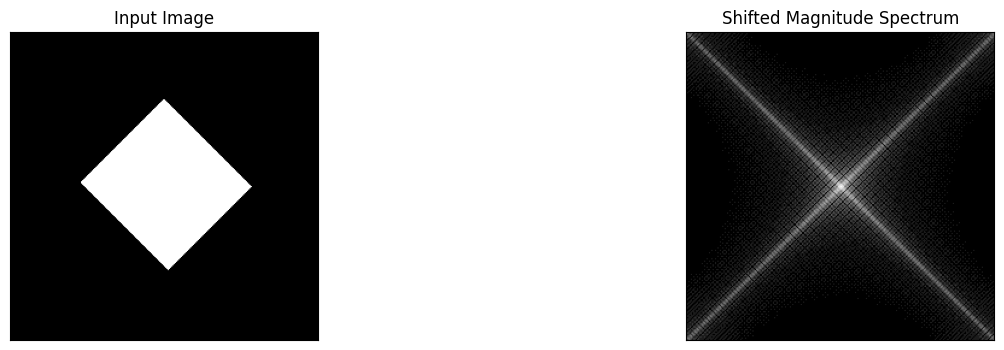

In [13]:
import numpy as np
import matplotlib.pyplot as plt


nx, ny = (256, 256)
x = np.linspace(0, nx-1, nx)
y = np.linspace(0, ny-1, ny)
i, j = np.meshgrid(x, y, sparse=True)
rotate_box = np.zeros((256,256),dtype=bool)
rotate_box = (i+j<329)&(i+j>182)&(i-j>-67)&(i-j<73)


plt.imshow(rotate_box)
plt.show()




# TO DO : Determine DFT of rotate_box
# before implementation, you can guess what FT of the rotate_box should look like?

f = np.fft.fft2(rotate_box)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+abs(fshift)) # fourier spectrum

fig = plt.figure(figsize=(16,4))
plt.subplot(121),plt.imshow(rotate_box.astype(np.uint8), cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum.astype(np.uint8), cmap = 'gray')
plt.title('Shifted Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()




## Exercise #2 cameraman.tif
Find DFT of cameraman and display the results

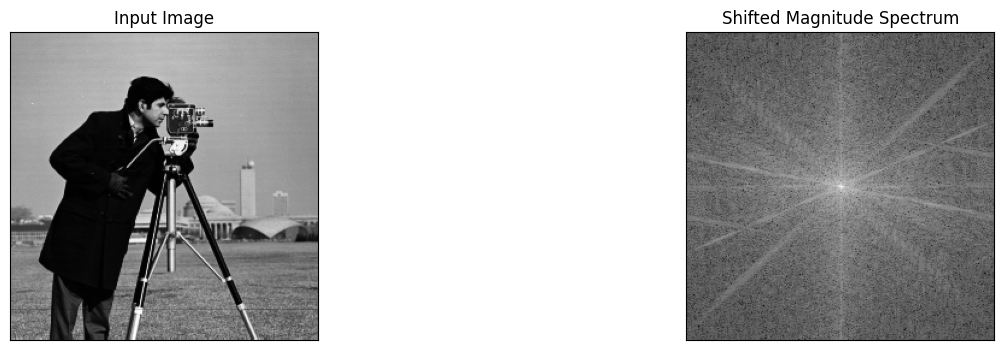

In [14]:
img = cv2.imread('cameraman.tif',0).astype(np.int16)

f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+abs(fshift)) # fourier spectrum

fig = plt.figure(figsize=(16,4))
plt.subplot(121),plt.imshow(img.astype(np.uint8), cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122)
plt.imshow(magnitude_spectrum.astype(np.uint8), cmap = 'gray')
plt.title('Shifted Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()


## Exercise #3 frequency filtering
* LPF
* HPF

* Ideal LPF

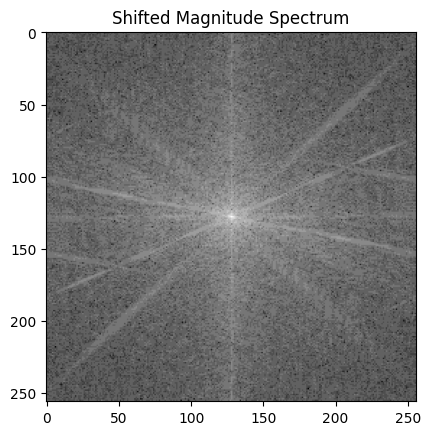

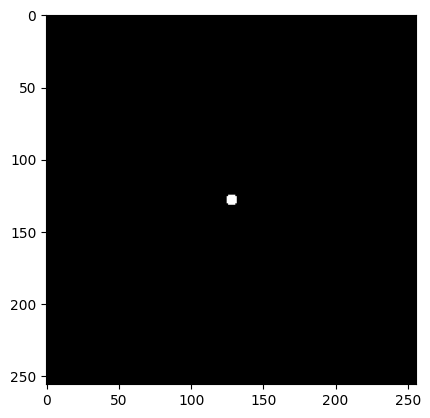

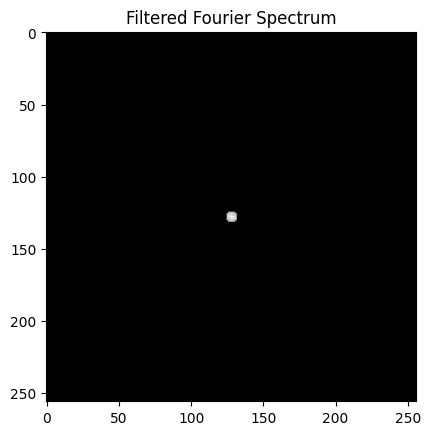

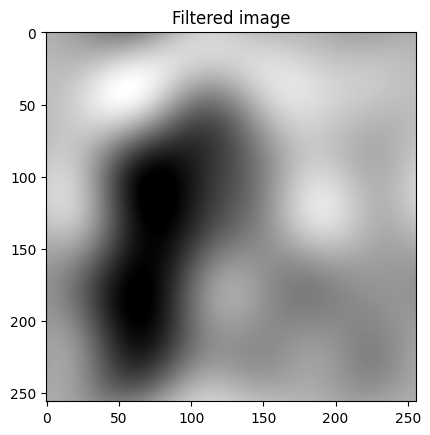

0.0 210.25359915160692


In [15]:
img = cv2.imread('cameraman.tif',0).astype(np.int16)

# calculate Fourier transform of an image
f = np.fft.fft2(img)

# shift origin (0,0) of Fourier transform to image center
fshift = np.fft.fftshift(f)

# calculate magnitude spectrum for visualization
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.imshow(magnitude_spectrum.astype(np.uint8), cmap = 'gray')
plt.title('Shifted Magnitude Spectrum')
plt.show()

# select cutoff frequency
D0 = 4

# prepare coordinates for generate a filter which has (0,0) at image center
nx, ny = (256, 256)
x = np.linspace(-nx/2, nx/2-1, nx)
y = np.linspace(-ny/2, ny/2-1, ny)
i, j = np.meshgrid(x, y, sparse=True)

# create ideal filter with cutoff freq. D0
ideal_filter = np.ones((nx,ny),dtype=bool) # 0,1
ideal_filter = np.sqrt(i*i+j*j)<D0
plt.imshow(ideal_filter,cmap='gray')
plt.show()

# # Filtering in frequency domain (multiplication)
img_ft_filter = fshift * ideal_filter
img_ft_filter_spectrum = np.log(1+np.abs(img_ft_filter))
plt.imshow(img_ft_filter_spectrum.astype(np.uint8), cmap = 'gray')
plt.title('Filtered Fourier Spectrum')
plt.show()

# # project the filtered image in freq. domain (u,v) back to spatial domain (x,y)
f_ishift = np.fft.ifftshift(img_ft_filter)
img_back = np.fft.ifft2(f_ishift)
img_back = np.real(img_back)
img_back[img_back<0] = 0
plt.imshow(img_back, cmap = 'gray')
plt.title('Filtered image');plt.show()
plt.show()
print(img_back.min(),img_back.max())

### 3.1 Butterworth LPF
* try different order
* try different cutoff freq

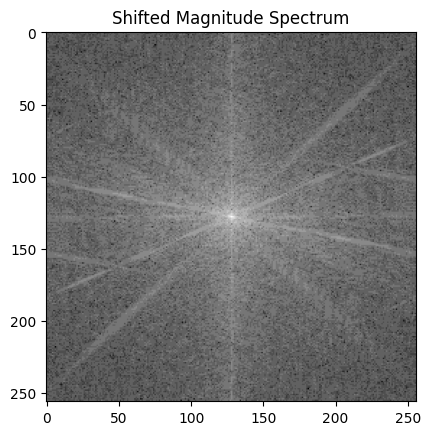

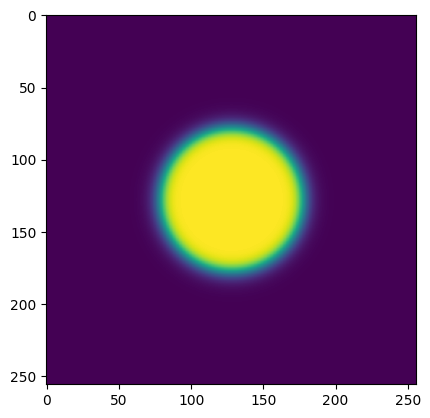

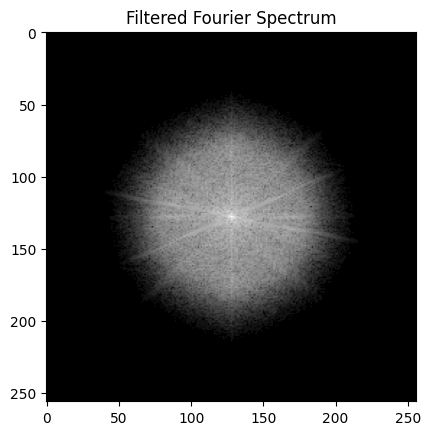

-21.077173619573745 274.7765105080644


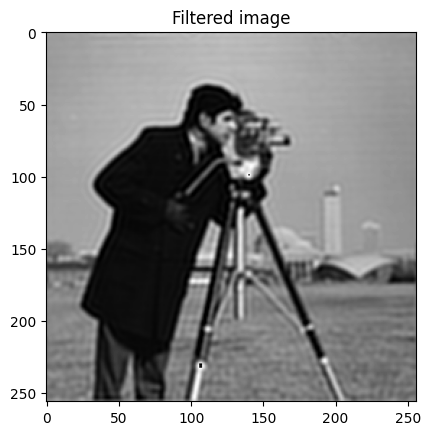

In [16]:
c = 50 # cutoff freq.
n = 8 # order

nx, ny = img.shape
x = np.linspace(-nx/2, nx/2-1, nx)
y = np.linspace(-ny/2, ny/2-1, ny)
btw = np.zeros((nx,ny),dtype=np.float32)
i, j = np.meshgrid(x, y, sparse=True)
# i,i -> u,v
btw_filter = 1/(1+(np.sqrt(i**2+j**2)/c)**(2*n))

img = cv2.imread('cameraman.tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))
plt.imshow(img, cmap = 'gray')
plt.title('Input Image')
plt.imshow(magnitude_spectrum.astype(np.uint8), cmap = 'gray')
plt.title('Shifted Magnitude Spectrum')
plt.show()



plt.imshow(btw_filter)
plt.show()

img_ft_filter = fshift * btw_filter
img_ft_filter_spectrum = np.log(1+np.abs(img_ft_filter))
plt.imshow(img_ft_filter_spectrum.astype(np.uint8), cmap = 'gray')
plt.title('Filtered Fourier Spectrum')
plt.show()

f_ishift = np.fft.ifftshift(img_ft_filter)
img_back = np.real(np.fft.ifft2(f_ishift))
print(img_back.min(),img_back.max())
img_back[img_back<0] = 0
plt.imshow(img_back.astype(np.uint8), cmap = 'gray')
plt.title('Filtered image')
plt.show()

### 3.2 Gaussian LPF

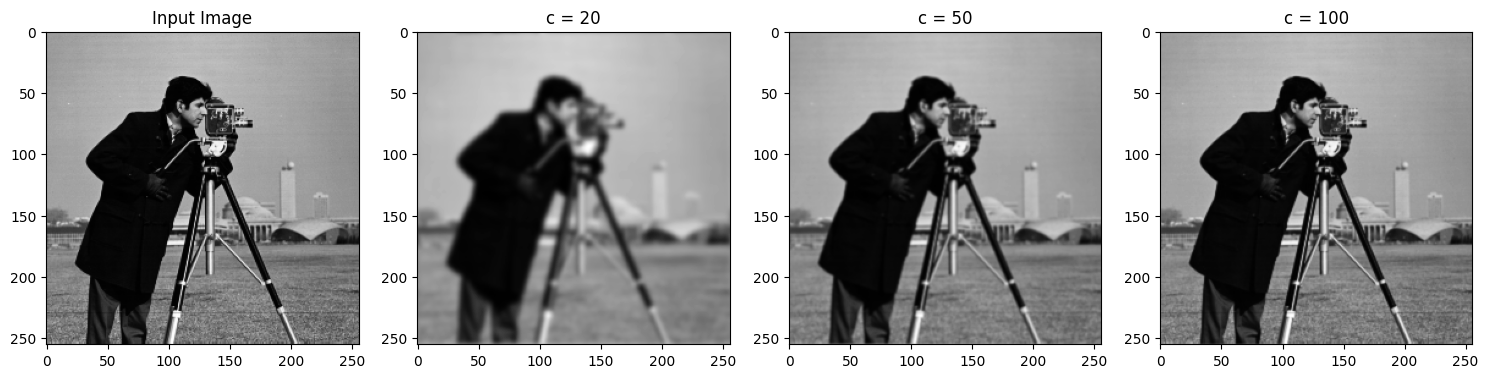

In [35]:
# Select the cutoff freq. -> enough to see information of cameraman
# -> ... image to frequency which c is enough?
c1 = 20
c2 = 50
c3 = 100


nx, ny = img.shape
x = np.linspace(-nx/2, nx/2-1, nx)
y = np.linspace(-ny/2, ny/2-1, ny)
gaussian_filter = np.zeros((nx,ny),dtype=np.float32)
i, j = np.meshgrid(x, y, sparse=True)

gaussian_filter1 = np.e**( -(i**2+j**2)/(2*c1**2) )
gaussian_filter2 = np.e**( -(i**2+j**2)/(2*c2**2) )
gaussian_filter3 = np.e**( -(i**2+j**2)/(2*c3**2) )

img = cv2.imread('cameraman.tif',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = np.log(1+np.abs(fshift))

# apply gaussian filter
img_ft_filter1 = fshift * gaussian_filter1
img_ft_filter2 = fshift * gaussian_filter2
img_ft_filter3 = fshift * gaussian_filter3


# invert back
f_ishift1 = np.fft.ifftshift(img_ft_filter1)
img_back1 = np.real(np.fft.ifft2(f_ishift1))

f_ishift2 = np.fft.ifftshift(img_ft_filter2)
img_back2 = np.real(np.fft.ifft2(f_ishift2))

f_ishift3 = np.fft.ifftshift(img_ft_filter3)
img_back3 = np.real(np.fft.ifft2(f_ishift3))

# show results
plt.figure(figsize=(15,6))
plt.subplot(141), plt.imshow(img, cmap = 'gray')
plt.title('Input Image')

plt.subplot(142),  plt.imshow(img_back1.astype(np.uint8), cmap = 'gray')
plt.title('c = 20')

plt.subplot(143),  plt.imshow(img_back2.astype(np.uint8), cmap = 'gray')
plt.title('c = 50')

plt.subplot(144),  plt.imshow(img_back3.astype(np.uint8), cmap = 'gray')
plt.title('c = 100')

plt.tight_layout()
plt.show()

### 3.3 Select one of the HPF

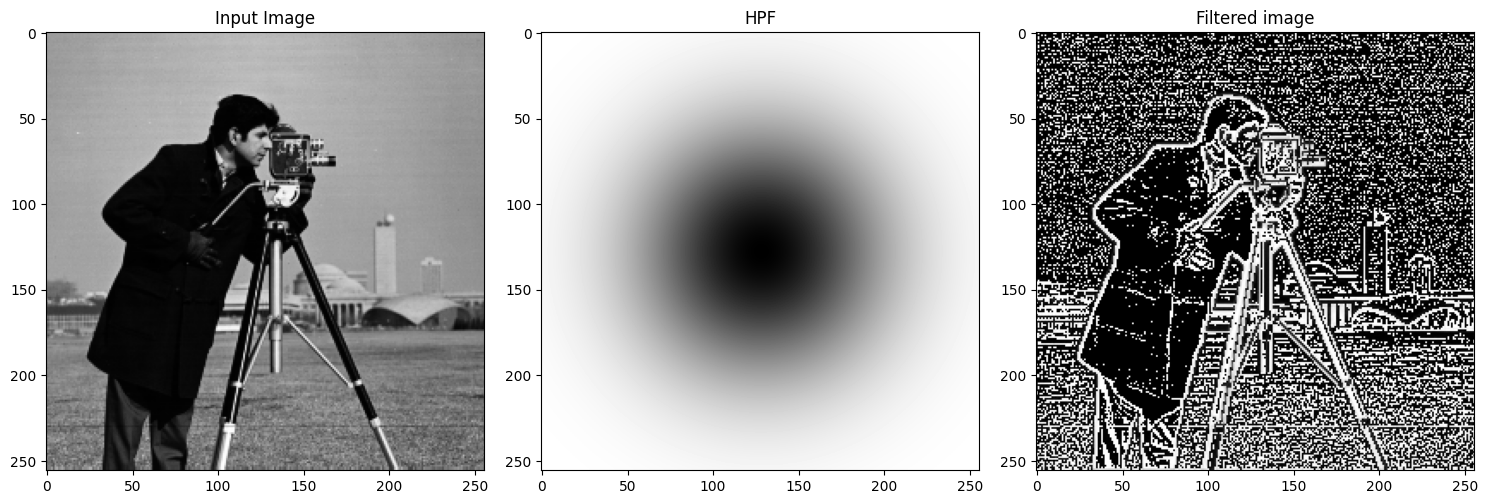

In [36]:
c = 50
img = cv2.imread('cameraman.tif',0)
nx, ny = img.shape
x = np.linspace(-nx/2, nx/2-1, nx)
y = np.linspace(-ny/2, ny/2-1, ny)
gaussian_filter = np.zeros((nx,ny),dtype=np.float32)
i, j = np.meshgrid(x, y, sparse=True)

gaussian_high = 1 - np.e**( -(i**2+j**2)/(2*c**2) )

# calculate Fourier transform of an image
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)

# apply filter
img_ft_filter = fshift * gaussian_high

# invert back
f_ishift = np.fft.ifftshift(img_ft_filter)
img_back = np.real(np.fft.ifft2(f_ishift))

# show
plt.figure(figsize=(15,6))
plt.subplot(131), plt.imshow(img, cmap = 'gray')
plt.title('Input Image')

plt.subplot(132),  plt.imshow(gaussian_high, cmap = 'gray')
plt.title('HPF')

plt.subplot(133),  plt.imshow(img_back.astype(np.uint8), cmap = 'gray')
plt.title('Filtered image')

plt.tight_layout()
plt.show()




## Exercise #4 Frequency vs. spatial domain


### 4.1 what is the ideal low pass filter in  spatial domain?

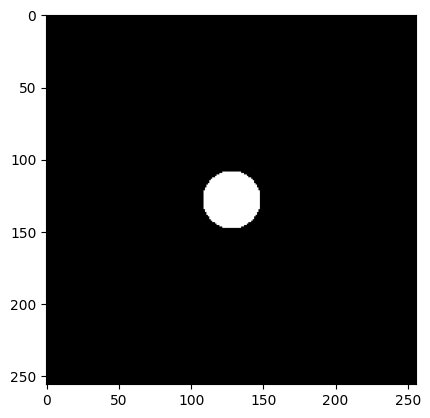

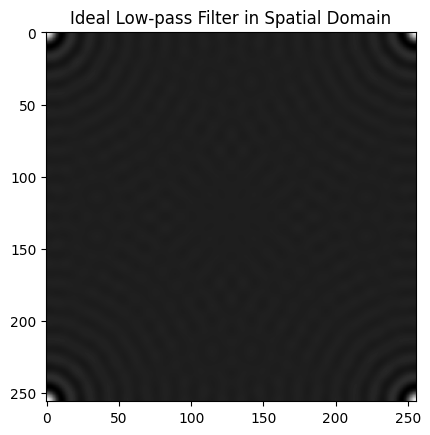

In [47]:
D0 = 20
ideal_filter = np.ones((nx,ny),dtype=bool) # 0,1
ideal_filter = np.sqrt(i*i+j*j)<D0
plt.imshow(ideal_filter,cmap='gray')
plt.show()


# TO DO: Convert this low pass filter to spatial domain
f_ishift = np.fft.ifftshift(ideal_filter)
img_back = np.real(np.fft.ifft2(f_ishift))
plt.imshow(img_back,cmap='gray')
plt.title("Ideal Low-pass Filter in Spatial Domain")
plt.show()

### 4.2 Can you enhance the moon in frequency domain?

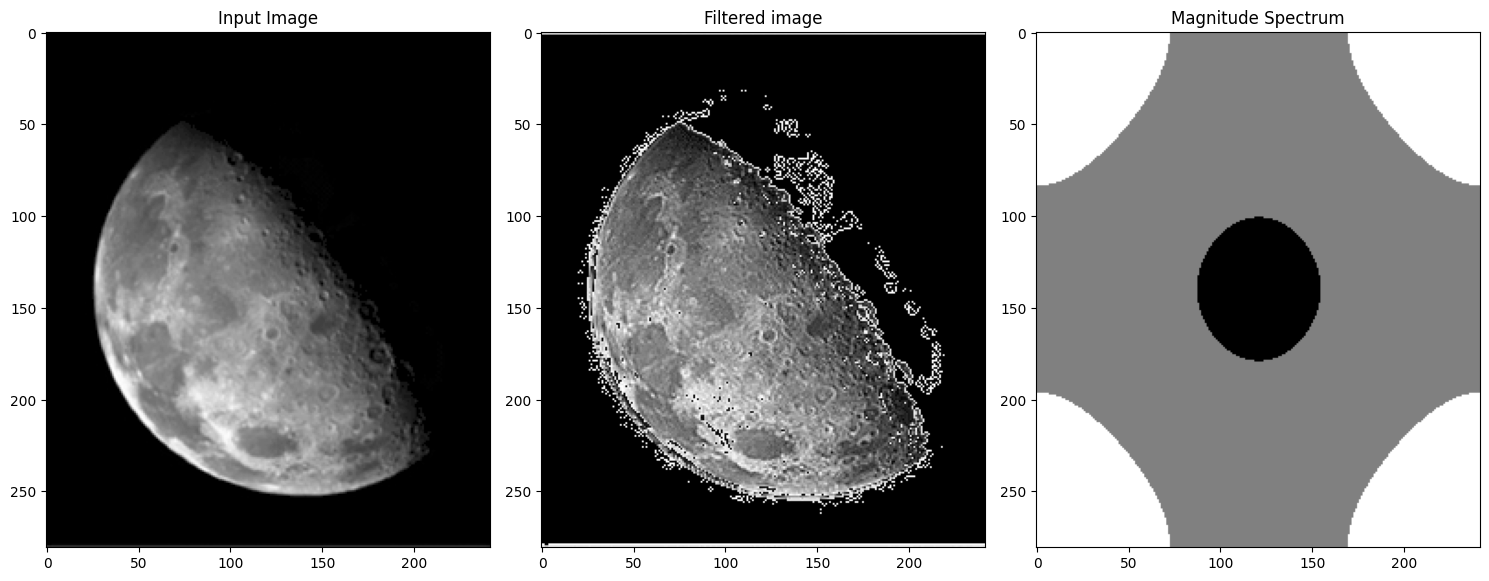

In [57]:
lp_kernel = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]],dtype=np.int16)
img_gray = cv2.imread("moon.png",0)

# calculate Fourier transform of an image
f = np.fft.fft2(img_gray)
fshift = np.fft.fftshift(f)

# Pad the kernel to match the image size
kernel_padded = np.zeros_like(img_gray, dtype=np.float32)
kh, kw = lp_kernel.shape
kernel_padded[:kh, :kw] = lp_kernel

# DFT for kernel
f_kernel = np.fft.fft2(kernel_padded)
fshift_kernel = np.fft.fftshift(f_kernel)
magnitude_spectrum = np.log(1+np.abs(fshift_kernel))

# Apply filter
img_ft_filter = fshift * fshift_kernel

# invert back
f_ishift = np.fft.ifftshift(img_ft_filter)
img_back = np.real(np.fft.ifft2(f_ishift))

# show
plt.figure(figsize=(15,6))
plt.subplot(131), plt.imshow(img_gray, cmap = 'gray')
plt.title('Input Image')

plt.subplot(132),  plt.imshow(img_back.astype(np.uint8), cmap = 'gray')
plt.title('Filtered image')

plt.subplot(133),  plt.imshow(magnitude_spectrum.astype(np.uint8), cmap = 'gray')
plt.title('Magnitude Spectrum')

plt.tight_layout()
plt.show()

